### Entropy

Entropy是什麼？

----------
Entropy 中文翻作「熵」，西元1854年由一位德國物理學家 Rodolph Clausius 提出，是一種對物理系統之無秩序或亂度的量度，早先應用於熱力學中，用來量度無法轉換成「功」的熱能。Claude Elwood Shannon在1948年將這概念引用到資訊領域來衡量接收到的資訊。

----------

再講的簡單一點，Entropy就是用來恆量一組資料的不確定性。

Entropy越大，越無秩序，反之，Entropy越小，越能將資訊整理成有序的型態。
再更白話一點，Entropy就是用來敘述當前狀況的複雜程度，越複雜我們也很難從中提取到有用的資訊。


**事件的資訊量∝事件的不確定程度**

我們來看一下他的公式。

<img src="pics/Entropy.webp" alt="Entropy" style="width: 400px">

假設今天為二項式機率，p(x)為x發生的機率

舉個實際的例子，今天有個變數Z，我們分別來看Z=1為不同機率的時候的Entropy

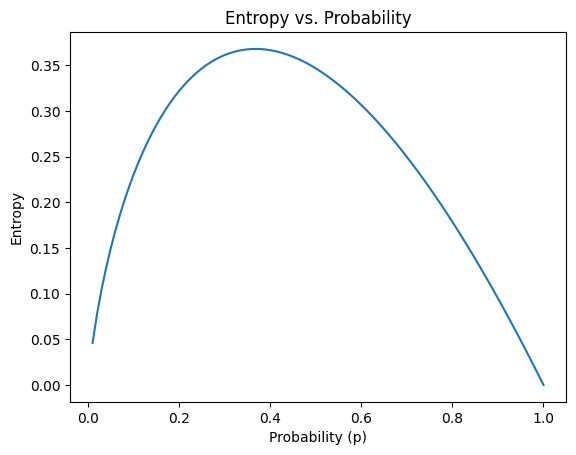

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z_p = np.linspace(0.01, 1, 100)
en_list = []
for p in z_p:
    entropy = -(p*np.log(p))
    en_list.append(entropy)

plt.plot(z_p, en_list)
plt.xlabel('Probability (p)')
plt.ylabel('Entropy')
plt.title('Entropy vs. Probability')
plt.show()

可以發現，當Z=1的機率越靠近0.5時，Entropy越大。可以想成「當Z出現0跟1的機率一樣時，此時我們最難猜測Z的可能數值。相反的，如果Z出現1的機率非常大，就可以直接視為Z=1，因此Z幾乎沒有不確定性，此時Entropy較小」。

這邊我們小結一下，如果熵比較大，表示此訊息有較多的可能狀態，也代表我們要用**更多的資源去表示p(x)**。

如果對應的每個狀態的可能性比較低；熵比較大，因此每當來了一個新的訊息，我們很難對其作出準確預測，即有著比較大的混亂程度/不確定性/不可預測性。

**Cross entropy**

上面的資訊告訴我們，只要我們只要知道機率分佈就能得出他的Entropy，但問題就在於，我們不知道。

因此我們會需要假設一個近似分佈q去逼近真實的機率分佈p，因此cross entropy就誕生了，我們來看一下他的公式：

<img src="pics/cross entropy.webp" alt="cross entropy" style="width: 400px">

我們跟KL散度做一下對比：

<img src="pics/KL divergence2.webp" alt="KL divergence2" style="width: 700px">

可以看得出，cross entroy就是KL散度的後半部，至於為什麼會這樣呢？

我們來看看這三者的分別定義，

* Entropy : 最少需要多少資源(編碼長度)去描述當前資訊，即該機率分佈本身的訊息含量。

* KL divergence : 計算兩分佈之間的差距，假設的q分佈與真實的p分佈差距之間的距離。

* Cross entropy : 用假設的q分佈來表示真實的p分佈時的訊息含量。

換個角度來理解公式：

<img src="pics/kl vs cross entropy.png" alt="kl vs cross entropy" style="width: 700px">

看得出，Cross entropy跟Entropy之間的差距就是KL散度，Entrpoy是p(x)用log(p(x))本身來表達，而Cross entropy則是p(x)用log(q(x))來表達。

到這裡我們先做兩個討論與總結：

1. CE(cross entropy)有可能會遇上log0的情況，因此implement中常會採用log(x+ϵ)

2. 在ML的task裡面，KL和CE是等價的，只是算KL的話還必須多算一個Entropy，所以大家都只算CE。

但實際上有了CE就能夠有光明的未來了嗎？那還不一定。

我們來實際的算算看，今天有個二元分類的task，標籤為0和1，我們希望模型能找出資料為1的機率，這時候我們用CE當成Loss function，可以寫成：

<img src="pics/loss1.png" alt="loss1" style="width: 400px">

由於模型是要找出標籤為1的資料，也就是y=1，我們可以進一步簡化公式

<img src="pics/loss2.png" alt="loss2" style="width: 300px">

那麼我們假設一個狀況，我們拿到一個不平衡的資料集，1非常少，這就導致了p值非常低，也就是會容易讓模型直接把資料都分類到標籤0。

因此有了對Cross entropy的優化，Balanced Cross Entropy

### Balanced Cross Entropy

### Focal Loss